In [26]:
#Importing libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score    
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import math

#For warnings
import warnings 
warnings.filterwarnings('ignore') 


In [6]:
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
data.shape

(506, 14)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [23]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

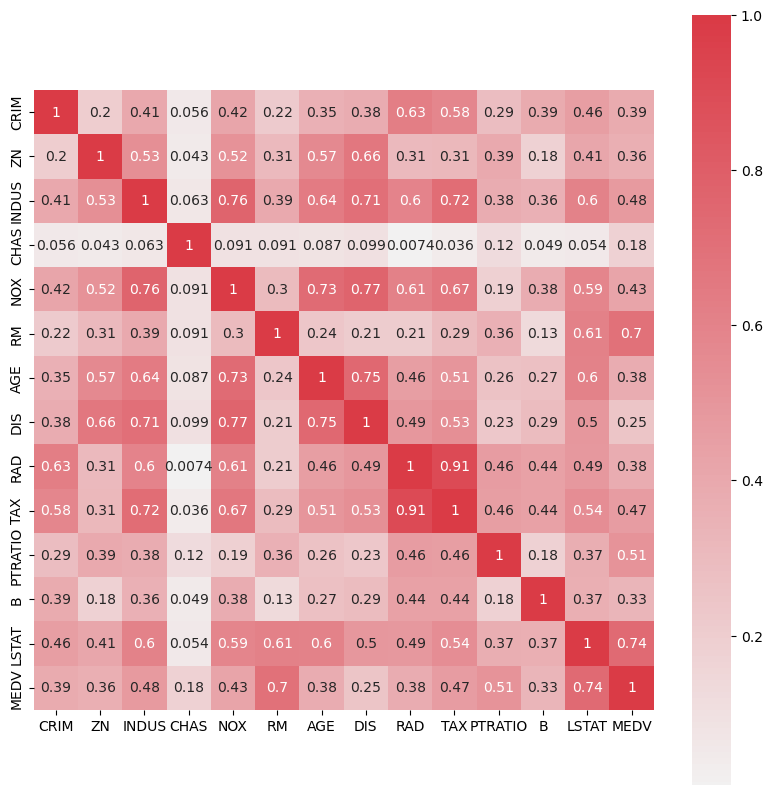

In [9]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(data.corr().abs(), cmap=cmap, center=0, square=True, annot =True)
plt.show()

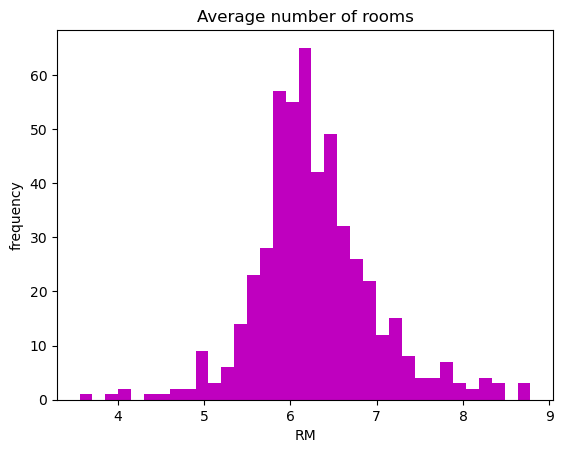

In [15]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['RM'], bins = 35,color='m')
plt.title("Average number of rooms")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()

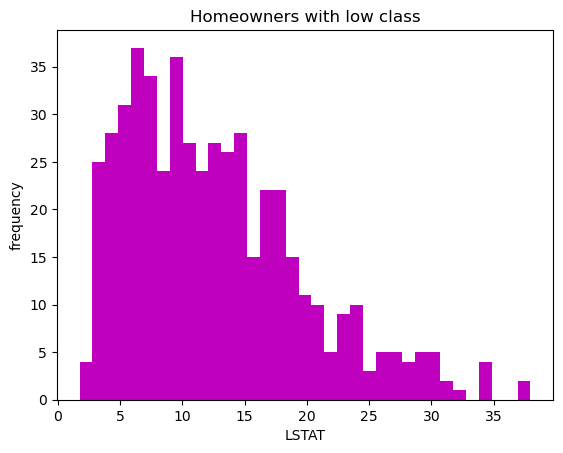

In [18]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['LSTAT'], bins = 35,color='m')
plt.title("Homeowners with low class")
plt.xlabel("LSTAT")
plt.ylabel("frequency")
plt.show()

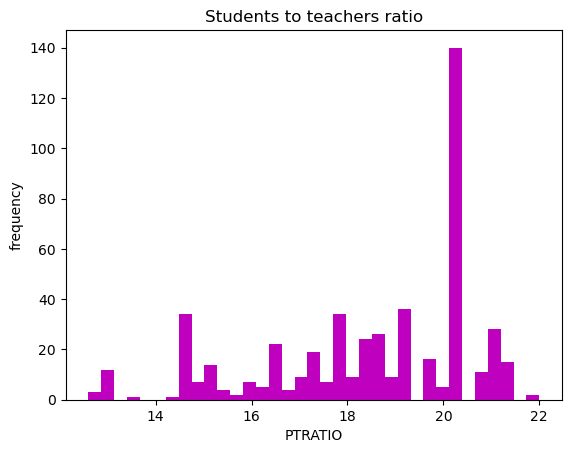

In [19]:
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.hist(data['PTRATIO'], bins = 35,color='m')
plt.title("Students to teachers ratio")
plt.xlabel("PTRATIO")
plt.ylabel("frequency")
plt.show()

In [20]:
#Clculate age
minAge=min(data.AGE)
maxAge=max(data.AGE)
meanAge=data.AGE.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 2.9 max = 100.0 mean = 68.57490118577076


In [21]:
#Prepare ages for a bie chart
Young = data[(data.AGE>=2.9)&(data.AGE<40)]
Middle = data[(data.AGE>=40)&(data.AGE<68)]
Old = data[(data.AGE>68)]

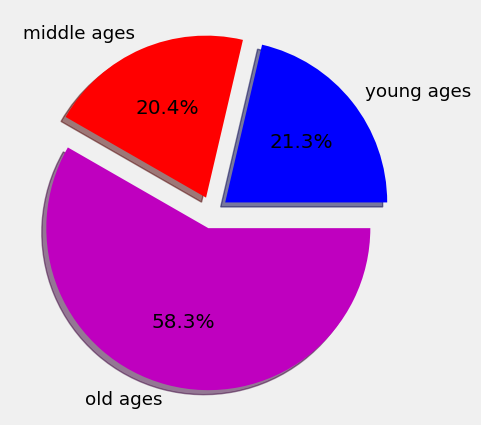

In [22]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

In [24]:
data.rename(columns={'MEDV':'PRICE'}, inplace = True)

In [25]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
X = data.iloc[:,0:13] #independent columns
y = data.iloc[:,-1] #target column i.e price range    
y = np.round(data['PRICE'])
#Apply SelectKBest class to extract top 5
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([datacolumns,datascores],axis=1)
featureScores.columns = ['SPECS','SCORE'] #naming the dataframe columns
featureScores

,SPECS,SCORE
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [33]:
featureScores.nlargest(8,'SCORE')

,SPECS,SCORE
9,TAX,14817.836927
1,ZN,5937.859414
0,CRIM,5503.817133
11,B,3340.486412
6,AGE,2424.308937
8,RAD,1445.257647
12,LSTAT,1430.549632
2,INDUS,873.746270


In [34]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)

RMSE score: 4.744683611865535
R2 score: 0.6730168121754789


In [42]:
print("Train Accuracy:",lr.score(X_train,y_train)*100)
print("Test Accuracy:",lr.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,lr.predict(X))*100)

Train Accuracy: 74.76828405613747
Test Accuracy: 67.3016812175479
Model Accuracy: 73.89307218679069


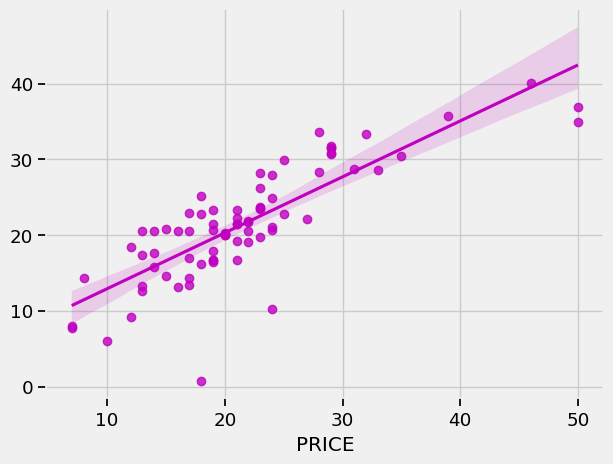

In [45]:
sns.regplot(x= y_test, y= y_pred,color='m');